In [1]:
!git clone https://github.com/Skyline-9/Visionary-Vids.git

Cloning into 'Visionary-Vids'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 349 (delta 12), reused 18 (delta 11), pack-reused 328
Receiving objects: 100% (349/349), 917.88 KiB | 6.42 MiB/s, done.
Resolving deltas: 100% (154/154), done.


In [1]:
%cd Visionary-Vids/results

[Errno 2] No such file or directory: 'Visionary-Vids/results'
/Users/austinpeng/Documents/gt/spring-2023/cs7643/final-project/Visionary-Vids/results


In [20]:
# import required module
import os
# assign directory (pick whichever dataset you want to do)
directory = 'qvhighlights'

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(f)

qvhighlights/qvhighlights_metrics.json
qvhighlights/loss_curve_qvhighlights_metrics.json.png


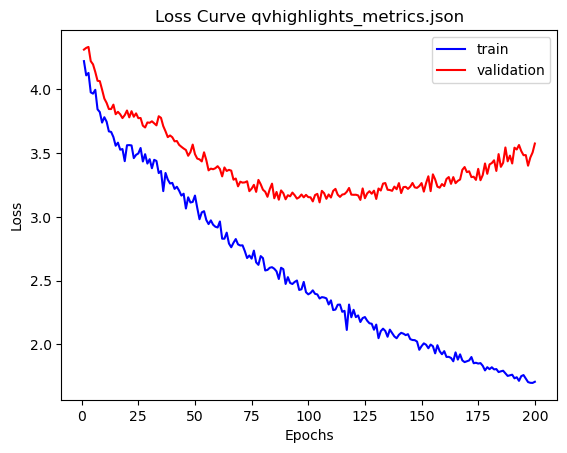

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [21]:
import json
import matplotlib.pyplot as plt
# iterate over files in
# that directory

for filename in os.listdir(directory):
    train_epochs = list()
    train_loss = list()
    val_epochs = list()
    val_loss = list()
    with open(os.path.join(directory, filename), "r") as f:
      i = 0
      for line in f:
        # Remove any leading/trailing whitespace and newlines
        line = line.strip()

        # Ignore empty lines
        if not line:
            continue

        # Decode the JSON object
        obj = json.loads(line)

        if obj["mode"] == "train":
          if (directory == "qvhighlights" and obj["iter"] == 226) or (directory == "charades" and obj["iter"] == 1551) or (directory == "tvsum") or (directory == "youtube"):
            train_epochs.append(obj["epoch"])
            train_loss.append(obj["loss"])
          
        elif obj["mode"] == "val":
          val_epochs.append(obj["epoch"])
          val_loss.append(obj["loss"])


    # Group the losses by epoch in groups of 10
    #groups = [(epochs[i:i+10], loss[i:i+10]) for i in range(0, len(loss), 10)]
    #min_epochs = [min(group[0]) for group in groups]
    #min_loss = [min(group[1]) for group in groups]
    # Plot the minimum losses for each group of 10 epochs

    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Plot the two lines
    ax.plot(train_epochs, train_loss, color='blue', label='train')
    ax.plot(val_epochs, val_loss, color='red', label='validation')

    # Set the title, axis labels, and legend
    ax.set_title(f'Loss Curve {filename}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

    # Show the plot
    plt.show()
    fig.savefig(f'loss_{filename}.png', dpi=600, bbox_inches='tight')
